In [70]:
from pandas import read_csv, concat, DataFrame
from pandas.plotting import register_matplotlib_converters
from matplotlib.pyplot import figure, savefig
from ds_charts import bar_chart, get_variable_types
from sklearn.impute import SimpleImputer
from numpy import nan

In [71]:

register_matplotlib_converters()
file = 'set1'
filename = 'new_data/set1_outliers.csv'
data = read_csv(filename, index_col='CRASH_DATE', parse_dates=True, infer_datetime_format=True)

,CRASH_TIME,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,EJECTION,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID,PERSON_INJURY
count,45669,45219.000000,45669,39434,45669,45669,6571,6546,39429,45669,45669,3.909800e+04,45669,6558,39448,45669,4.566900e+04,6571,4.566900e+04,45669
unique,24,NaN,14,16,3,4,4,39,4,19,8,NaN,45669,39,10,5,NaN,16,NaN,2
top,16:00,NaN,Back,Lap Belt & Harness,M,Occupant,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,Not Ejected,Complaint of Pain or Nausea,Conscious,NaN,06869fa4-85f9-4499-9491-11132224bdce,Unspecified,Driver,Driver,NaN,Crossing With Signal,NaN,Injured
freq,3006,NaN,7505,18184,27573,32903,3953,5772,35883,27958,42180,NaN,1,4675,26053,26542,NaN,2481,NaN,45416
mean,NaN,36.785334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.999663e+07,NaN,NaN,NaN,NaN,1.183588e+07,NaN,4.431737e+06,NaN
std,NaN,16.588986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.940981e+04,NaN,NaN,NaN,NaN,1.375828e+05,NaN,2.753403e+04,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.982197e+07,NaN,NaN,NaN,NaN,1.153725e+07,NaN,4.380715e+06,NaN
25%,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.996078e+07,NaN,NaN,NaN,NaN,1.177289e+07,NaN,4.408781e+06,NaN
50%,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000877e+07,NaN,NaN,NaN,NaN,1.185680e+07,NaN,4.432358e+06,NaN
75%,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.005868e+07,NaN,NaN,NaN,NaN,1.194421e+07,NaN,4.455395e+06,NaN


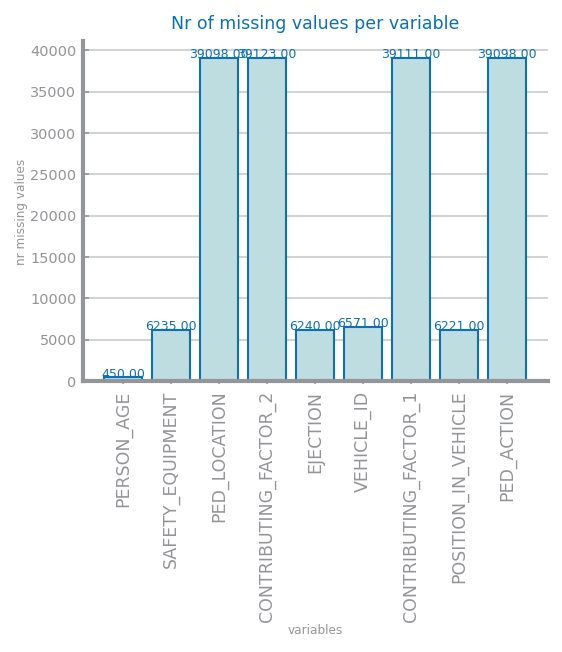

In [72]:
mv = {}
figure()
for var in data:
    nr = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

bar_chart(list(mv.keys()), list(mv.values()), title='Nr of missing values per variable', xlabel='variables', ylabel='nr missing values', rotation=True)
savefig(f'images/{file}_missing_values_number.png')
data.describe(include='all')


Dropped variables ['PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'CONTRIBUTING_FACTOR_1', 'PED_ACTION']


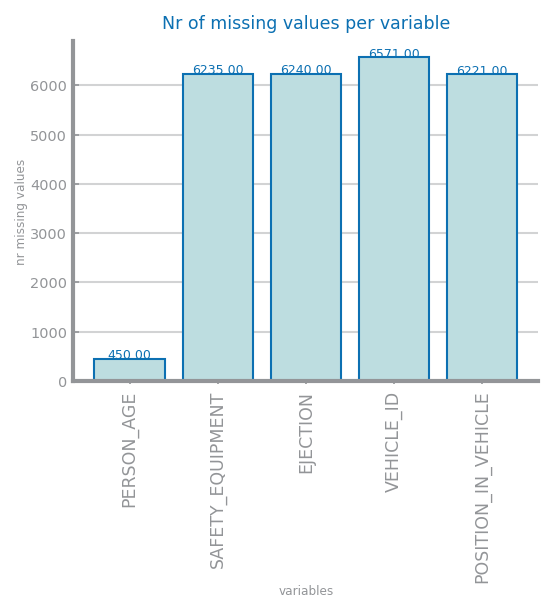

In [73]:
# defines the number of records to discard entire columns
threshold = data.shape[0] * 0.84

missings = [c for c in mv.keys() if mv[c]>threshold]
df_drop_columna = data.drop(columns=missings, inplace=False)
df_drop_columna.to_csv(f'new_data/{file}_drop_columns_mv.csv', index=False)
print('Dropped variables', missings)

mv = {}
figure()
for var in df_drop_columna.columns:
    nr = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

bar_chart(list(mv.keys()), list(mv.values()), title='Nr of missing values per variable', xlabel='variables', ylabel='nr missing values', rotation=True)
savefig(f'images/{file}_missing_values_number_drop_columns.png')

In [78]:

tmp_nr, tmp_sb, tmp_bool = None, None, None
variables = get_variable_types(data)
variables_fill_NA = ['VEHICLE_ID', 'POSITION_IN_VEHICLE', 'EJECTION', 'SAFETY_EQUIPMENT']
variables_fill_mean = ['PERSON_AGE']

imp = SimpleImputer(strategy='constant', fill_value='NA', missing_values=nan, copy=True)
tmp_sb = DataFrame(imp.fit_transform(data[variables_fill_NA]), columns=variables_fill_NA)

mean_age = round(data['PERSON_AGE'].mean(),0)
imp = SimpleImputer(strategy='constant', fill_value=mean_age, missing_values=nan, copy=True)
tmp_nr = DataFrame(imp.fit_transform(data[variables_fill_mean]), columns=variables_fill_mean)

df_filled_NA = concat([tmp_nr, tmp_sb, tmp_bool], axis=1)
df_filled_NA.to_csv(f'new_data/{file}_mv.csv', index=False)
df_filled_NA.describe(include='all')

,PERSON_AGE,VEHICLE_ID,POSITION_IN_VEHICLE,EJECTION,SAFETY_EQUIPMENT
count,45669.000000,45669,45669,45669,45669
unique,NaN,31404,11,5,17
top,NaN,NA,Driver,Not Ejected,Lap Belt & Harness
freq,NaN,6571,26053,35883,18184
mean,36.787449,NaN,NaN,NaN,NaN
std,16.507066,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN,NaN
50%,34.000000,NaN,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN
